## Data *Munging*

In [1]:
import pandas as pd
def time_convert(x):
    """ Converti una stringa dal formato hh:mm:ss in nu"""
    try:
        times = x.split(':')
        return (3600*int(times[0])+60*int(times[1]))+int(times[2])
    except:
        return float('nan')
    
def ReadParseData(filename):
    # E` necessario convertire il tempo di gara in secondi, per poterlo confrontare nelle regressioni
    Cs = {'Official Time': time_convert, '5K': time_convert, 'M/F': lambda x: int(x == 'M')}    
    # EQUIVALENTE A:
    #Cs = dict() # oppure Cs = {}
    #Cs['Official Time'] = time_convert
    #Cs['M/F'] = lambda x: int(x == 'M')
    
    # Leggere la documentazione di "read_csv":
    # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
    bm = pd.read_csv(filename, converters=Cs)
    
    # SCARTA LE COLONNE CHE NON SERVONO
    #bm.drop(bm.columns[[0,1,4,5,8,9]], axis=1, inplace=True)
    #bm.drop(bm.columns[[2,3,4,5,6,7,8,9,10,11,12,13]], axis=1, inplace=True)
    # OPPURE: Dedici quali serie tenere
    bm = bm[['Age','M/F','5K', 'Official Time','Overall','Gender','Division']]
    
    # Remove
    print('Numero dati PRIMA del preprocessing:', len(bm))
    bm = bm[bm['5K'] > 0]
    print('Numero dati DOPO il preprocessing:', len(bm))
    return bm
    
bm = ReadParseData('./data/marathon_results_2016.csv')
# STAMPA LE PRIME 3 RIGHE DEL DATA FRAME
#bm[:3]
bm[27:36]

Numero dati PRIMA del preprocessing: 26630
Numero dati DOPO il preprocessing: 26578


,Age,M/F,5K,Official Time,Overall,Gender,Division
27,24,1,1045.0,8949,28,28,26
28,29,0,1102.0,8959,29,1,1
29,24,1,1002.0,8963,30,29,27
30,34,1,1036.0,8972,31,30,28
31,28,1,1056.0,8991,32,31,29
32,31,0,1102.0,9003,33,2,2
33,24,1,1043.0,9022,34,32,30
34,27,1,1032.0,9027,35,33,31
35,27,0,1102.0,9050,36,3,3


## Explanatory data analysis (statistica descrittiva)

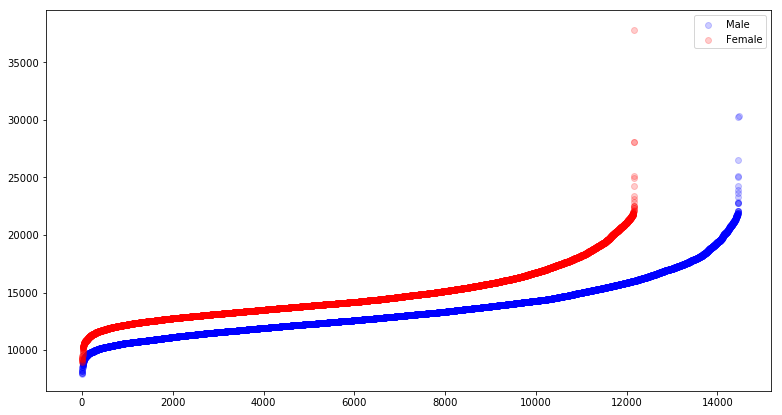

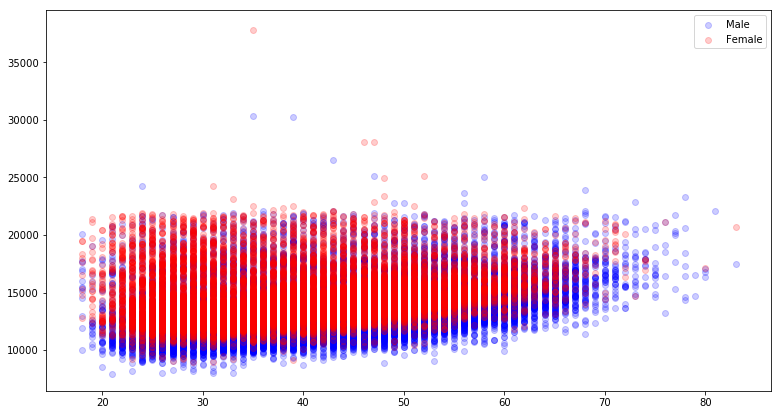

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def ScatterPlot(bm, Feature1, Feature2):
    sub = bm.copy()
    
    # Seleziona feature da plottare
    ym = sub[(sub['M/F'] == 1)][Feature1]
    xm = sub[(sub['M/F'] == 1)][Feature2]

    yf = sub[sub['M/F'] == 0][Feature1]
    xf = sub[sub['M/F'] == 0][Feature2]

    # Disegna il plot
    fig, ax = plt.subplots(figsize=(13, 7))

    ax.scatter(xm, ym, alpha=0.2, c='blue')
    ax.scatter(xf, yf, alpha=0.2, c='red')

    ax.legend(('Male', 'Female'))
    plt.show()
    
ScatterPlot(bm, 'Official Time', 'Gender')
ScatterPlot(bm, 'Official Time', 'Age')

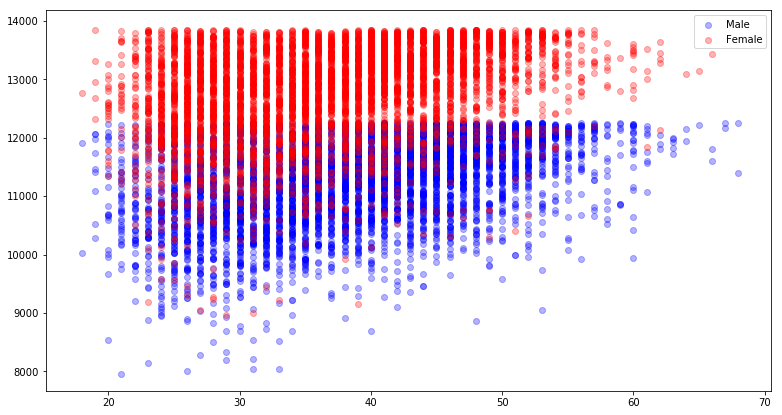

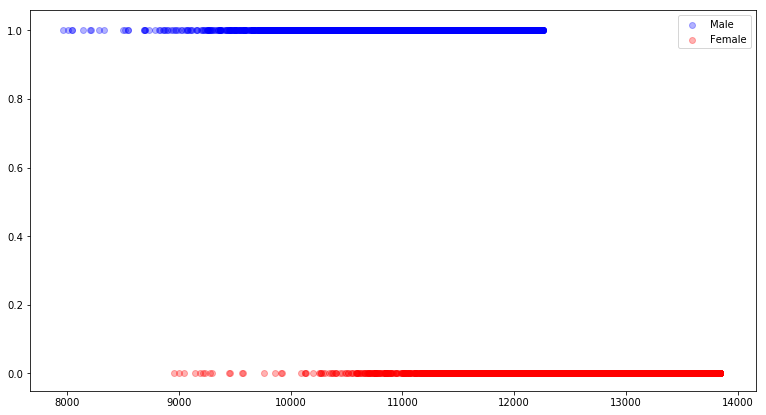

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def FilterPlot(F1, F2, threshold):
    # Filtra il dataframe
    sub = bm[bm.Gender < threshold]
    
    ym = sub[(sub['M/F'] == 1)][F1]
    xm = sub[(sub['M/F'] == 1)][F2]

    yf = sub[sub['M/F'] == 0][F1]
    xf = sub[sub['M/F'] == 0][F2]

    # Disegna il plot
    fig, ax = plt.subplots(figsize=(13, 7))

    ax.scatter(xm, ym, alpha=0.3, c='blue')
    ax.scatter(xf, yf, alpha=0.3, c='red')

    ax.legend(('Male', 'Female'))
    plt.show()
    
FilterPlot('Official Time', 'Age', 5000)
FilterPlot('M/F', 'Official Time', 5000)

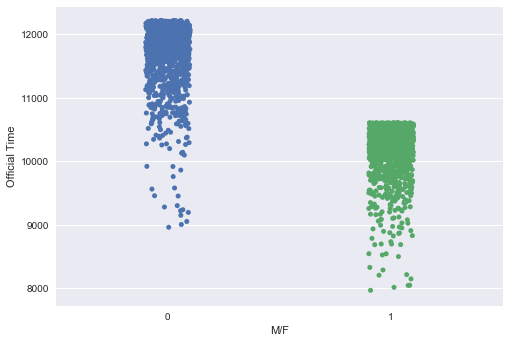

In [4]:
import seaborn as sns

def PlotStrip(bm, threshold=1000):
    # Filtra il dataframe
    sub = bm[bm.Gender < threshold]    
    sns.stripplot(y='Official Time', x='M/F', data=sub, jitter=True)
    sns.plt.show()

PlotStrip(bm)

## Supervised Learning: Classificazione tramite Regressione

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

def GenerateTrainTestSet(bm, Fs, F2, threshold=200000):
    sub = bm[bm.Gender < threshold]
    x_train, x_test, y_train, y_test = train_test_split(sub[Fs], sub[F2], random_state=0)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = GenerateTrainTestSet(bm, ['Official Time'], 'M/F')

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def PrintEvaluation(y_test, y_pred):
    try:
        print('MAE:', mean_absolute_error(y_test, y_pred))
        print('MSE:', mean_squared_error(y_test, y_pred))
        print('R2:', r2_score(y_test, y_pred))    
        print('ACCURACY:', accuracy_score(y_test, y_pred))
        print('REPORT:',classification_report(y_test, y_pred))
        print('CM:', confusion_matrix(y_test, y_pred))
    except:
        print('Errore nel calcolo delle statistiche: Debug il tuo codice')

In [7]:
def PlotPredictions(x_test, y_test, y_pred):
    # Plot valori di test
    fig, ax = plt.subplots(figsize=(13, 7))
    ax.scatter(x_test, y_test, alpha=0.3, c='blue')
    
    # Plot valori predetti
    fig, ax = plt.subplots(figsize=(13, 7))
    ax.scatter(x_test, y_pred, alpha=0.3, c='red')

    plt.show()

### Regressione Lineare

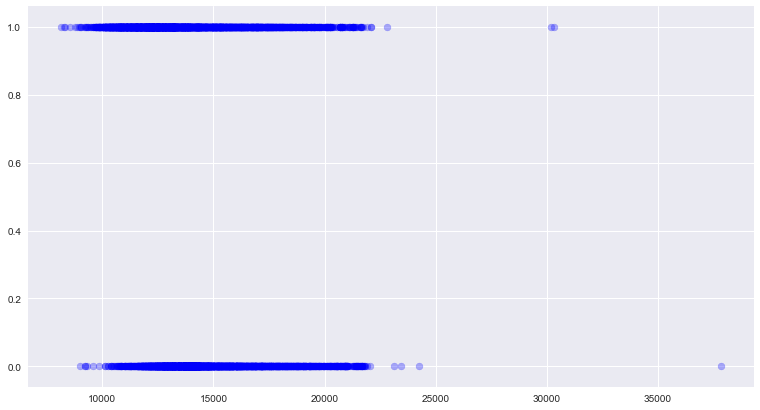

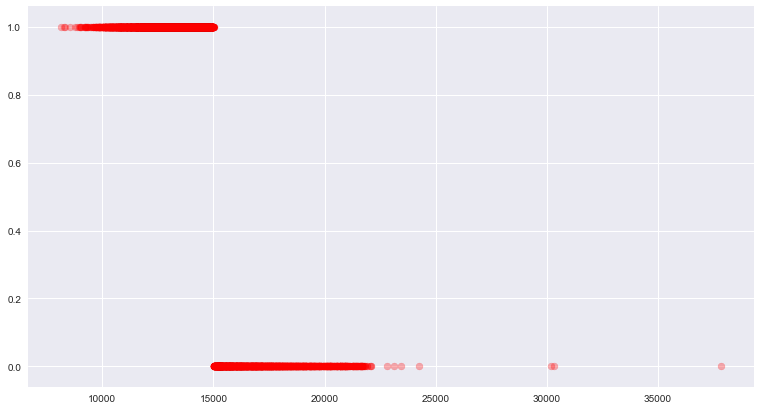

MAE: 0.432204665162
MSE: 0.432204665162
R2: -0.736748046112
ACCURACY: 0.567795334838
REPORT:              precision    recall  f1-score   support

          0       0.56      0.35      0.43      3098
          1       0.57      0.76      0.65      3547

avg / total       0.57      0.57      0.55      6645

CM: [[1093 2005]
 [ 867 2680]]


In [8]:
from sklearn.linear_model import LinearRegression    

def RunLinearRegression(x_train, x_test, y_train):
    lr = LinearRegression(normalize=False)
    # Input to this function must be "DataFrames"
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    y_pred = [1 if p > 0.5 else 0 for p in y_pred]
    return y_pred

y_pred = RunLinearRegression(x_train, x_test, y_train)
PlotPredictions(x_test, y_test, y_pred)
PrintEvaluation(y_test, y_pred)

C:\Users\gualandi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


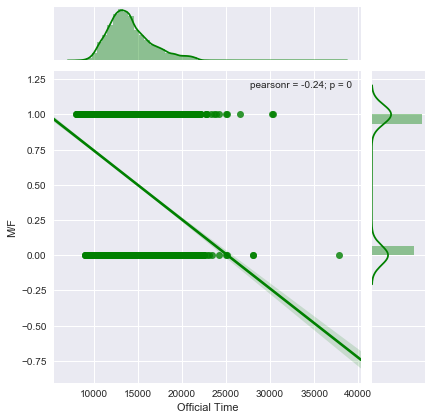

In [9]:
import seaborn as sns
sns.jointplot(data=bm, x='Official Time', y='M/F', kind='reg', color='g')
sns.plt.show()

### Regressione Logistica

In [10]:
from sklearn.linear_model import LogisticRegression

def RunLogisticRegression(x_train, x_test, y_train):
    logit = LogisticRegression(penalty='l2', class_weight='balanced')
    # Input to this function must be "DataFrames"
    logit.fit(x_train, y_train)
    y_pred = logit.predict_proba(x_test)
    print(y_pred[:3])
    y_pred = [1 if p[0] < p[1] else 0 for p in y_pred]
    
    return y_pred
    
y_pred = RunLogisticRegression(x_train, x_test, y_train)
PrintEvaluation(y_test, y_pred)

[[ 0.41502752  0.58497248]
 [ 0.44816276  0.55183724]
 [ 0.4881548   0.5118452 ]]
MAE: 0.393227990971
MSE: 0.393227990971
R2: -0.580126268974
ACCURACY: 0.606772009029
REPORT:              precision    recall  f1-score   support

          0       0.58      0.57      0.57      3098
          1       0.63      0.64      0.64      3547

avg / total       0.61      0.61      0.61      6645

CM: [[1753 1345]
 [1268 2279]]


C:\Users\gualandi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


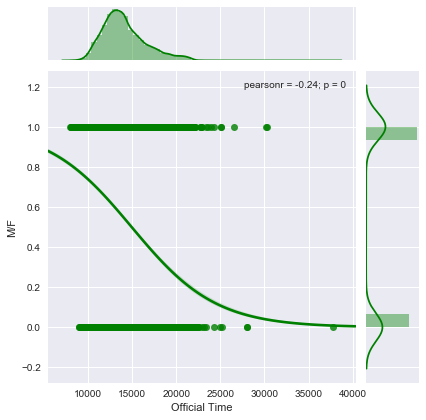

In [11]:
sns.jointplot(data=bm, x='Official Time', y='M/F', kind='reg', color='g', logistic=True)
sns.plt.show()

### Nearest Neighbours

In [12]:
from sklearn import neighbors

def RunNeighborClassifier(x_train, x_test, y_train):
    knn = neighbors.KNeighborsClassifier(n_neighbors=5)
    # Input to this function must be "DataFrames"
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    return y_pred

y_pred = RunNeighborClassifier(x_train, x_test, y_train)
PrintEvaluation(y_test, y_pred)

MAE: 0.41625282167
MSE: 0.41625282167
R2: -0.67264801377
ACCURACY: 0.58374717833
REPORT:              precision    recall  f1-score   support

          0       0.55      0.55      0.55      3098
          1       0.61      0.61      0.61      3547

avg / total       0.58      0.58      0.58      6645

CM: [[1718 1380]
 [1386 2161]]
